# Visualize Face Clustering Results

## Load Clustering Results

In [1]:
from matplotlib import pyplot as plt
import json
import cv2

In [12]:
RESULT_DIRS = (
    "results/HOG-dlib-DBSCAN",
    "results/harr-dlib-DBSCAN",
)

In [9]:
cluster_infos = []
for result_dir in RESULT_DIRS:
    with open(f"{result_dir}/clustered_results.json", "r") as f:
        cluster_infos.append(json.load(f))

cluster_infos[0].keys(), cluster_infos[0][list(cluster_infos[0].keys())[0]][:3]

(dict_keys(['-1', '0', '1', '2', '3', '4']),
 [[290], [667, 696, 725, 754, 783, 812, 841], [928, 957]])

## Visualize Results

### Original Video

- [https://www.youtube.com/watch?v=bUQj7Ng7PCs](https://www.youtube.com/watch?v=bUQj7Ng7PCs)

### Clustering Results

In [82]:
def display_results(result_dir, cluster_id, scenes):
    print(f"ID-{cluster_id}:")
    frame_num = sum([len(frame_ids) for frame_ids in scenes])
    rows, cols = int(frame_num/6)+1, 10
    i = 0
    fig = plt.figure(figsize=(15, rows*2))
    for scene_id, frame_ids in enumerate(scenes):
        for frame_id in frame_ids:
            i += 1
            fig.add_subplot(rows, cols, i)
            img_path = f"{result_dir}/clustered_imgs/fid-{cluster_id}-{scene_id}-{frame_id}.jpg"
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
    plt.tight_layout()
    plt.show()

#### Clustered Images

- Harr Cascade Detection 모델이 얼굴 인식을 더 많이 하지만 잘못 인식하는 경우도 늘어남

Method: results/HOG-dlib-DBSCAN
ID-0:


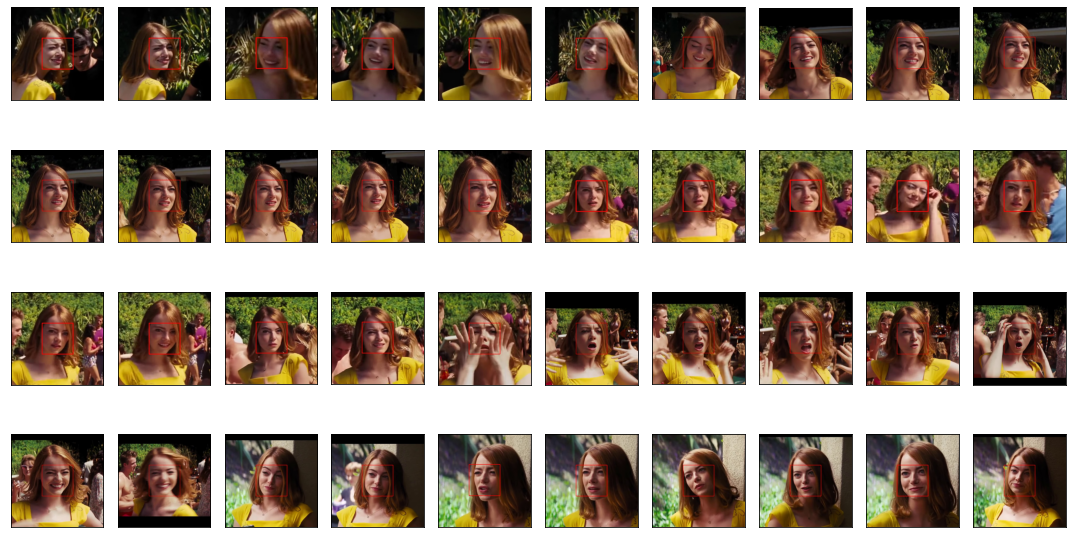

ID-1:


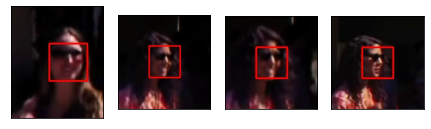

ID-2:


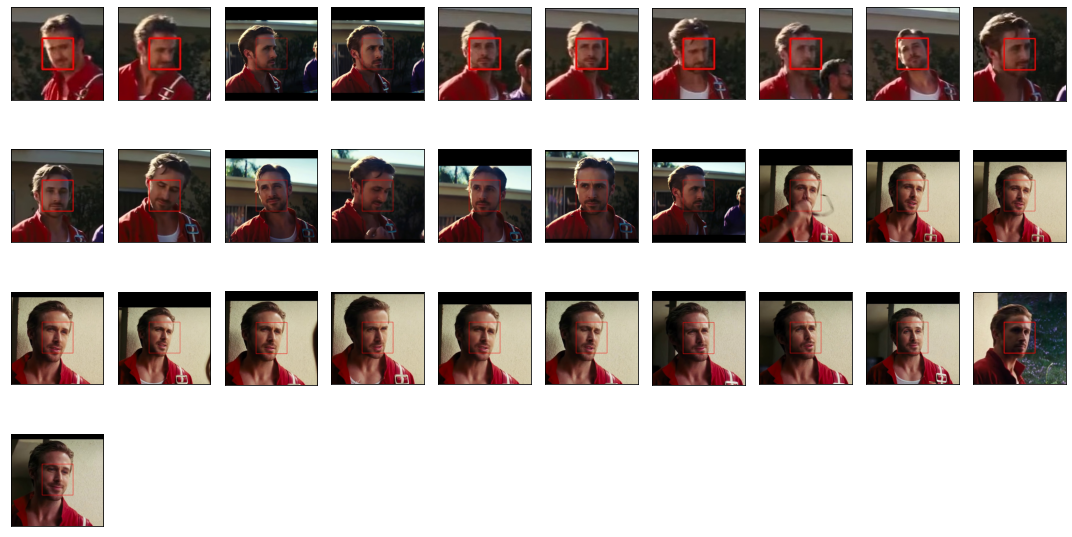

ID-3:


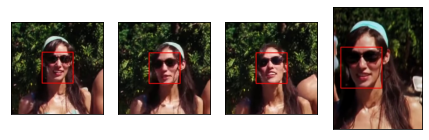

ID-4:


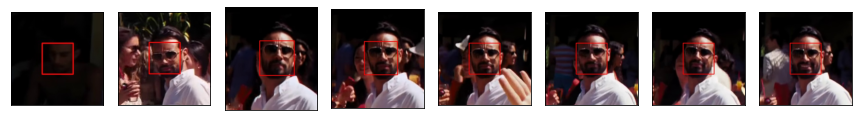

Method: results/harr-dlib-DBSCAN
ID-0:


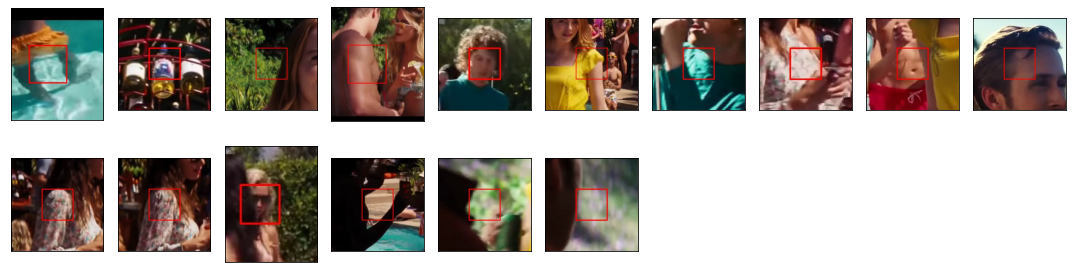

ID-1:


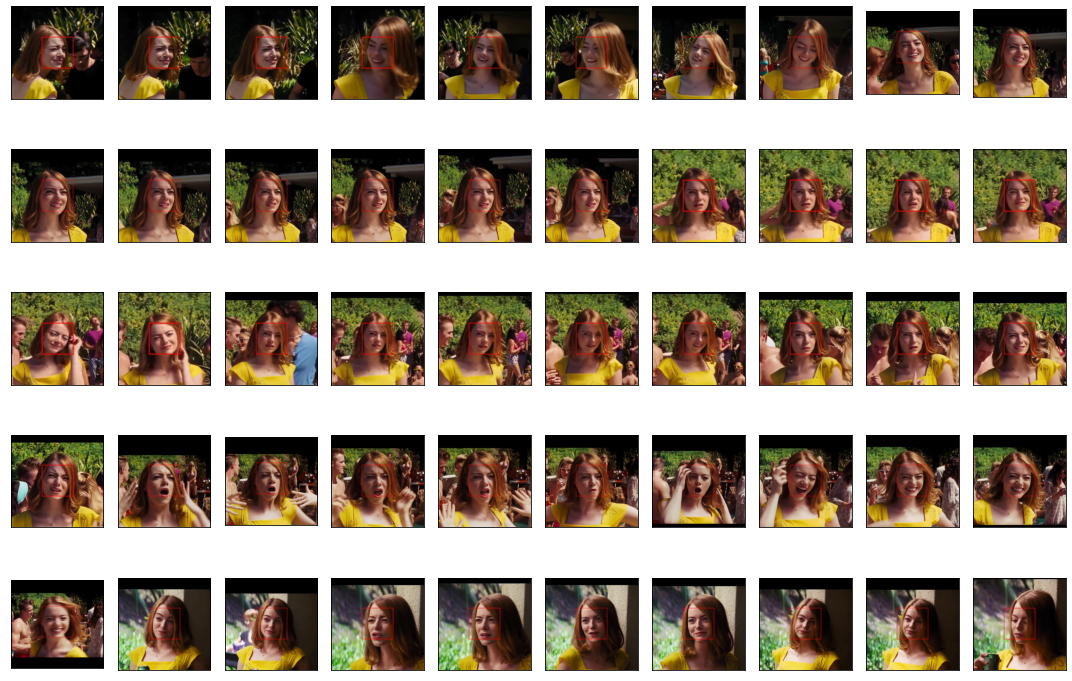

ID-2:


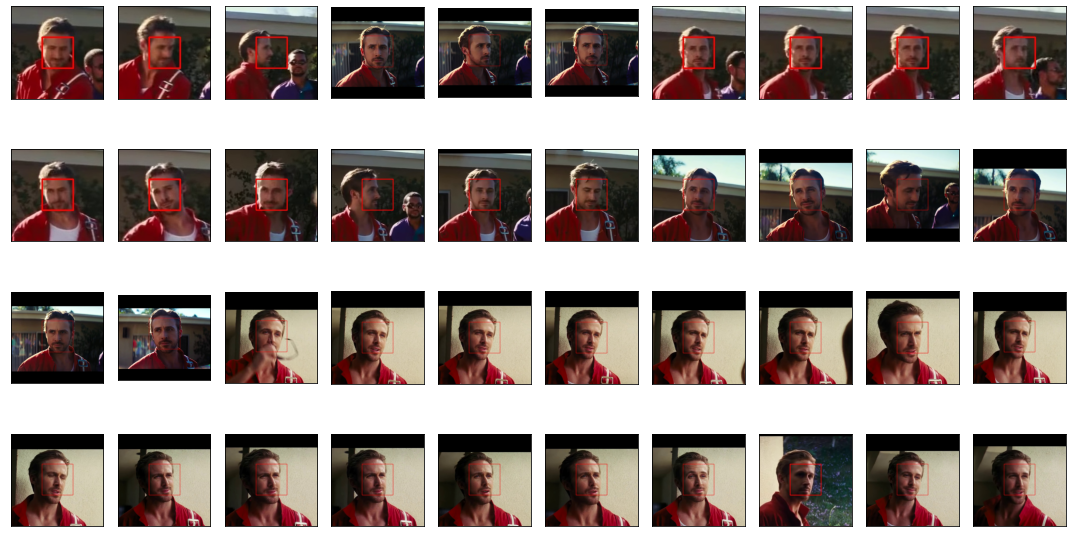

ID-3:


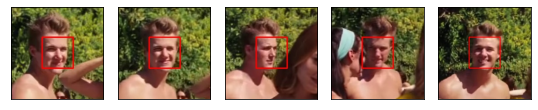

ID-4:


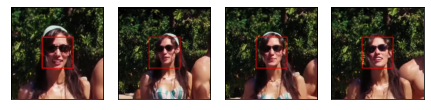

ID-5:


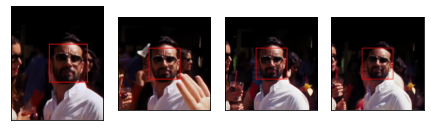

In [83]:
for result_dir, cluster_info in zip(RESULT_DIRS, cluster_infos):
    print(f"Method: {result_dir}")
    for cluster_id, scenes in cluster_info.items():
        if cluster_id != "-1":
            display_results(result_dir, cluster_id, scenes)

#### Not-Clustered Images

- Harr Cascade Detection 모델 결과에서 Cluster가 생기지 않는 경우가 더 줄어듦

Method: results/HOG-dlib-DBSCAN
ID--1:


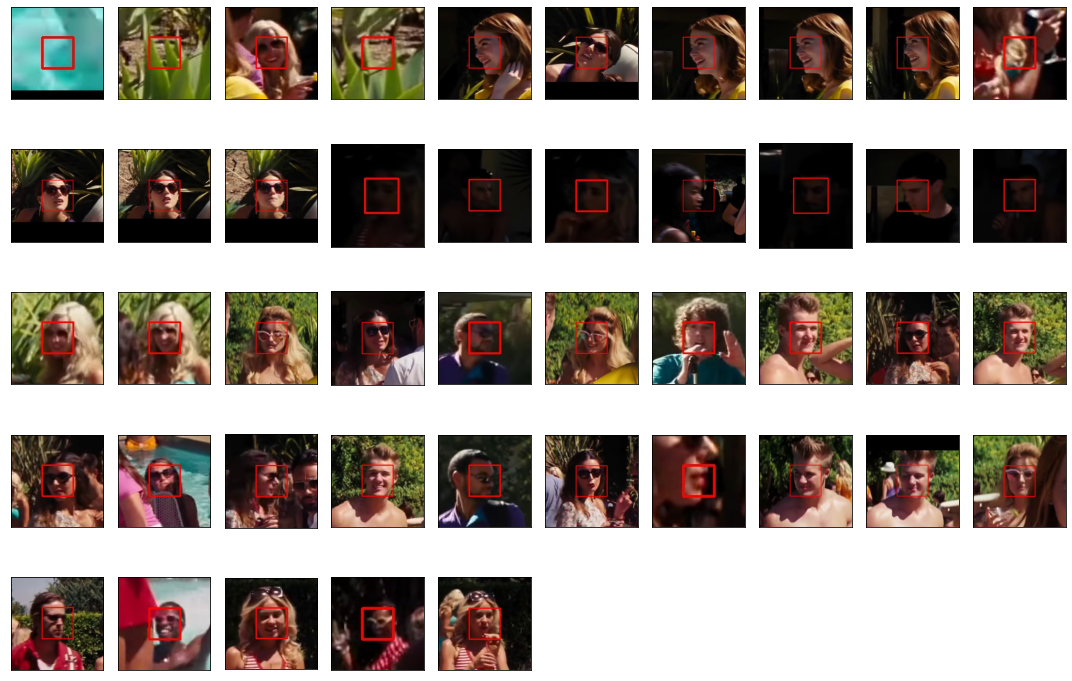

Method: results/harr-dlib-DBSCAN
ID--1:


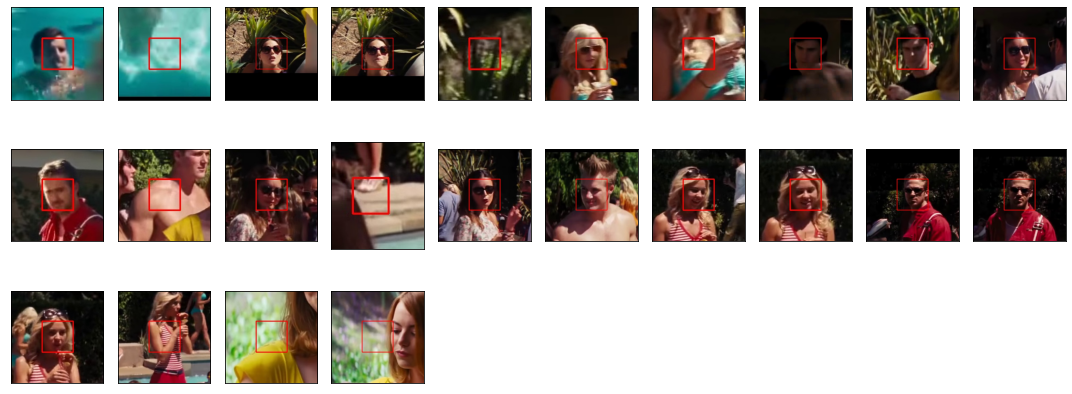

In [84]:
for result_dir, cluster_info in zip(RESULT_DIRS, cluster_infos):
    print(f"Method: {result_dir}")
    for cluster_id, scenes in cluster_info.items():
        if cluster_id == "-1":
            display_results(result_dir, cluster_id, scenes)

#### 추가 의견

- 얼굴이 인식되지 않은 결과에 대해서는 위 Visualization으로 알 수 없음